In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Bandit class representing each arm with a fixed reward probability
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean  # True mean of the bandit's reward
        self.estimated_mean = 0     # Estimated mean
        self.n_pulls = 0            # Number of times the bandit is pulled

    def pull(self):
        return np.random.randn() + self.true_mean  # Pulling the arm and receiving reward

    def update(self, reward):
        # Update the estimated mean of the bandit using incremental average
        self.n_pulls += 1
        self.estimated_mean = self.estimated_mean + (1 / self.n_pulls) * (reward - self.estimated_mean)

In [5]:
# Epsilon-greedy strategy function
def epsilon_greedy(bandits, epsilon, n_trials):
    total_reward = np.zeros(n_trials)
    cumulative_reward = np.zeros(n_trials)

    for i in range(n_trials):
        # Epsilon-Greedy strategy: explore or exploit
        if np.random.rand() < epsilon:
            # Explore: Choose a random bandit
            bandit = np.random.choice(len(bandits))
        else:
            # Exploit: Choose the best estimated bandit
            bandit = np.argmax([b.estimated_mean for b in bandits])

        # Pull the chosen bandit and receive the reward
        reward = bandits[bandit].pull()
        bandits[bandit].update(reward)

        # Track the total reward and cumulative reward
        total_reward[i] = reward
        cumulative_reward[i] = total_reward[:i+1].sum()

    return cumulative_reward

In [6]:
# Set up the environment
def run_experiment(epsilon_values, n_trials, n_bandits):
    # True means for each bandit (stationary environment)
    true_means = np.random.randn(n_bandits)

    # Run the experiment for each epsilon
    results = {}
    for epsilon in epsilon_values:
        bandits = [Bandit(true_mean) for true_mean in true_means]  # Create bandits
        results[epsilon] = epsilon_greedy(bandits, epsilon, n_trials)

    return results, true_means

In [7]:
# Parameters
n_trials = 1000
n_bandits = 5
epsilon_values = [0.1, 0.05, 0.01]  # Different epsilon values to compare

# Run the experiment
results, true_means = run_experiment(epsilon_values, n_trials, n_bandits)

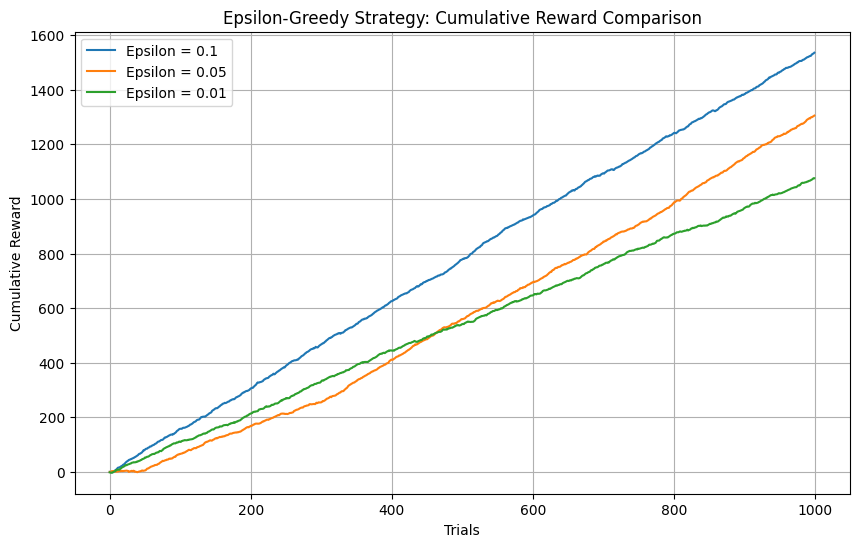

In [8]:
# Plot the cumulative rewards for each epsilon
plt.figure(figsize=(10, 6))
for epsilon, rewards in results.items():
    plt.plot(rewards, label=f'Epsilon = {epsilon}')

plt.xlabel('Trials')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy Strategy: Cumulative Reward Comparison')
plt.legend()
plt.grid()
plt.show()